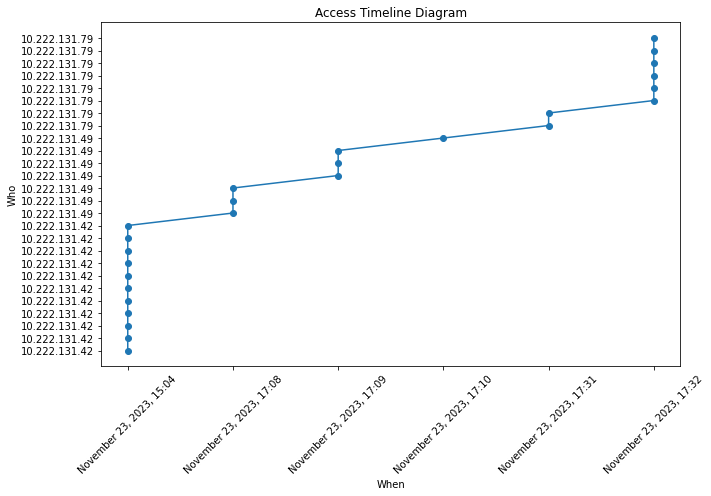

In [7]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

log_file_path = '/var/log/apache2/access_log'

ip_addresses = []
dates = []

with open(log_file_path, 'r') as log_file:
    for line in log_file:
        if "/~mbayemirov" in line:
            match = re.match(r'(\S+) (\S+) (\S+) \[([^\]]+)\] "(.+)" (\S+) (\S+) "(.+)" "(.+)"', line)
                                    
            if match:
                ip_address = match.group(1)
                date_str = match.group(4)
                browser = match.group(9)
                                
                # Convert the date string to a datetime object
                date = datetime.strptime(date_str, "%d/%b/%Y:%H:%M:%S %z")
                formatted_date = date.strftime("%B %d, %Y, %H:%M")

                ip_addresses.append(ip_address)
                dates.append(formatted_date)

# Sort the data based on dates
sorted_data = sorted(zip(dates, ip_addresses))

# Extract sorted dates and corresponding IP addresses
sorted_dates, sorted_ips = zip(*sorted_data)

# Plot the timeline diagram
plt.figure(figsize=(10, 7))
plt.plot(sorted_dates, range(1, len(sorted_dates) + 1), marker='o', linestyle='-')

# Beautify the plot
plt.title('Access Timeline Diagram')
plt.xlabel('When')
plt.ylabel('Who')
plt.yticks(range(1, len(sorted_dates) + 1), sorted_ips)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()